# I. Informations sur les données #

In [236]:
# Import des bibliothèques :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [ ]:
# Import du jeu de données :
barometre = pd.read_csv("../Données/dataset-barometre.csv", 
                        sep = ";",  
                        encoding = 'utf-8', 
                        engine = 'python', 
                        decimal = ',')

In [238]:
# Paramétrage du style de police des graphiques : 
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 16

In [239]:
# Affichage des premières lignes du tableau 'barometre' :
barometre.head(3)

,Vague,S1. genre,S2. âge,S3. Zone géo,Région,Département,S7. Taille commune,S7b. Taille commune,S7c. Taille commune,S6. Situation professionnelle,...,Reso. Usage Instagram,Reso. Usage Facebook,Reso. Usage WhatsApp,Reso. Usage Twitter,Reso. Usage TikTok,Reso. Usage YouTube,poids,UC,age,insee
0,Vague 01,Un homme,65 ans et +,Nord Est,Alsace - Champagne - Ardennes - Lorraine,Meurthe-et-Moselle,NaN,En zone rurale,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.570370,NaN,68.0,NaN
1,Vague 01,Un homme,35-49 ans,Nord Est,Alsace - Champagne - Ardennes - Lorraine,Meurthe-et-Moselle,NaN,Dans une agglomération de 100.000 habitants et...,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.112676,NaN,40.0,NaN
2,Vague 01,Un homme,25-34 ans,Ile de France,Ile de France,Seine-Saint-Denis,NaN,Dans l'agglomération parisienne,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.112676,NaN,34.0,NaN


In [240]:
# Affichage des informations du tableau 'baromètre' :
barometre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29387 entries, 0 to 29386
Columns: 221 entries, Vague to insee
dtypes: float64(6), object(215)
memory usage: 49.5+ MB


In [241]:
# Affichage du nombre de lignes et de colonnes du tableau 'baromètre' :
rows, cols = barometre.shape
print(f"Dans le jeu de données, il y a {rows} lignes et {cols} colonnes.")

Dans le jeu de données, il y a 29387 lignes et 221 colonnes.


In [242]:
# Affichage des noms de variables du tableau 'baromètre' :
for col in barometre.columns:
    print(col)

Vague
S1. genre
S2. âge
S3. Zone géo
Région
Département
S7. Taille commune
S7b. Taille commune
S7c. Taille commune
S6. Situation professionnelle
S5. CSP
q1_1. Enjeu important 1
q1_2. Enjeu important 2
q1_3. Enjeu important 3
q1total. Enjeu Emploi
q1total. Enjeu Sécurité
q1total. Enjeu Education et recherche
q1total. Enjeu Inégalités
q1total. Enjeu Logement
q1total. Enjeu Impôts et taxes
q1total. Enjeu Hausse des prix
q1total. Enjeu Immigration
q1total. Enjeu Environnement/Transition écologique
q1total. Enjeu Déficits publics
q1total. Enjeu Banlieues
q1total. Enjeu Transports
q1total. Enjeu Santé publique
q1total. Enjeu No rep.
q2_1. Problème environnemental 1
q2_2. Problème environnemental 2
q2total. Problème pollution de l'air
q2total. Problème pollution de l'eau
q2total. Problème bruit
q2total. Problème risques nucléaire
q2total. Problème déchets
q2total. Problème dégradation biodiversité
q2total. Problème Effet de serre/ réchauffement climatique
q2total. Problème dégradation des pay

# II. Préparation et nettoyage des données #

### A. Changement du nom de la colonne "Q10x" et remplacement des données qu'elle contient ###

In [243]:
# Recherche de l'index de la variable 'q10x. Parmi ces trois opinions, laquelle est la plus proche de la vôtre ?' :
index_q10x = barometre.columns.get_loc('q10x. Parmi ces trois opinions, laquelle est la plus proche de la vôtre ?')
print("L'index de la question 'q10x' est ", index_q10x, ".")

L'index de la question 'q10x' est  54 .


In [244]:
# Changement du nom de la variable de la question "q10x" :
barometre = barometre.rename(columns={ 'q10x. Parmi ces trois opinions, laquelle est la plus proche de la vôtre ?': 'opinion'})
print("Le nouveau titre de la colonne ", index_q10x, "est ", barometre.columns[index_q10x], ".")

Le nouveau titre de la colonne  54 est  opinion .


In [245]:
# Affichage des valeurs uniques de la variable "opinion" :
print("Les valeurs uniques de la colonne 'opinion' sont :", barometre['opinion'].unique())

Les valeurs uniques de la colonne 'opinion' sont : [nan
 "Il y a actuellement un changement climatique et il est dû à l'activité humaine"
 'Il y a actuellement un changement climatique et il est dû à un phénomène naturel comme la Terre en a toujours connu'
 "Vous n'avez pas d'avis"
 "Il n'y a pas actuellement de changement climatique" 'No rep.']


In [246]:
# Conversion des réponses 'No rep' et 'Vous n'avez pas d'avis' en valeurs nulles :
barometre.replace('No rep.', 
                  np.nan, 
                  inplace = True)
barometre.replace("Vous n'avez pas d'avis", 
                  np.nan, 
                  inplace = True)

In [247]:
# Affichage des valeurs uniques de la variable "opinion" :
print("Les valeurs uniques de la variable 'opinion' sont :", barometre['opinion'].unique())

Les valeurs uniques de la variable 'opinion' sont : [nan
 "Il y a actuellement un changement climatique et il est dû à l'activité humaine"
 'Il y a actuellement un changement climatique et il est dû à un phénomène naturel comme la Terre en a toujours connu'
 "Il n'y a pas actuellement de changement climatique"]


In [248]:
# Décompte du nombre de valeurs total dans la colonne "opinion" :
nb_valeurs = barometre['opinion'].shape[0]
print("Il y a ", nb_valeurs, "valeurs dans la colonne 'opinion'.")

Il y a  29387 valeurs dans la colonne 'opinion'.


In [249]:
# Décompte du nombre de valeurs nulles dans la colonne 'opinion' :
nb_valeurs_nulles_opinion = barometre['opinion'].isnull().sum()
print("Il y a ", nb_valeurs_nulles_opinion, "valeurs nulles dans la colonne 'opinion'. Il y a donc ", nb_valeurs-nb_valeurs_nulles_opinion, "valeurs non-nulles dans la colonne 'opinion'.")

Il y a  27946 valeurs nulles dans la colonne 'opinion'. Il y a donc  1441 valeurs non-nulles dans la colonne 'opinion'.


In [250]:
# Création du dictionnaire de remplacement des données de la colonne 'opinion' :
dictionnaire = {
    "Il y a actuellement un changement climatique et il est dû à l'activité humaine": 'Activité humaine',
    "Il y a actuellement un changement climatique et il est dû à un phénomène naturel comme la Terre en a toujours connu": "Phénomène naturel",
    "Vous n'avez pas d'avis": "Sans avis",
    "Il n'y a pas actuellement de changement climatique" : "Absence de phénomène"
    }

In [251]:
# Remplacement des données de la colonne 'opinion' :
barometre['opinion'] = barometre['opinion'].replace(dictionnaire)
print("Le nouvel intitulé des données de la colonne 'opinion' sont :", barometre['opinion'].unique())

Le nouvel intitulé des données de la colonne 'opinion' sont : [nan 'Activité humaine' 'Phénomène naturel' 'Absence de phénomène']


### B. Arrondi et conversion des données de la colonne "age" ###

In [252]:
# Affichage du contenu de la colonne 'age' :
print("le contenu de la colonne 'age' est :", barometre['age'].head(3))

le contenu de la colonne 'age' est : 0    68.0
1    40.0
2    34.0
Name: age, dtype: float64


In [253]:
# Arrondi et conversion des données de la colonne 'age':
barometre['age'] = barometre['age'].round(0).astype(int)
print("Le type de données contenues dans la colonne 'age' est", barometre['age'].dtype, ".")

Le type de données contenues dans la colonne 'age' est int64 .


In [254]:
# Affichage de l'age maximum des participants : 
age_max = barometre['age'].max()
print("L'âge maximum des participants est de ", age_max, "ans.")

L'âge maximum des participants est de  99 ans.


### C. Remplacement des données de la colonne 'Vague' ###

In [255]:
# Détermination de l'index de la colonne 'Vague' :
index_vague = barometre.columns.get_loc('Vague')
print("L'index de la variable 'Vague' est ", index_vague, ".")

L'index de la variable 'Vague' est  0 .


In [256]:
# Dictionnaire de remplacement des données de la colonne 'Vague' :
dictionnaire_vague = { 
    "Vague 01" : '2000',
    "Vague 02" : '2001',
    "Vague 03" : '2002',
    "Vague 04" : '2003',
    "Vague 05" : '2004',
    "Vague 06" : '2005',
    "Vague 07" : '2006',
    "Vague 08" : '2007',
    "Vague 09" : '2008',
    "Vague 10" : '2009',
    "Vague 11" : '2010',
    "Vague 12" : '2011',
    "Vague 13" : '2012',
    "Vague 14" : '2013',
    "Vague 15" : '2014',
    "Vague 16" : '2015',
    "Vague 17" : '2016',
    "Vague 18" : '2017',
    "Vague 19" : '2018',
    "Vague 20" : '2019',
    "Vague 21" : '2020',
    "Vague 22" : '2021',
    "Vague 23" : '2022',
    "Vague 24" : '2023'
    }

In [257]:
# Remplacement des données de la colonne 'Vague' :
barometre['Vague'] = barometre['Vague'].replace(dictionnaire_vague)
print("Les nouvelles données de la colonne 'Vague' sont :", barometre['Vague'].unique())

Les nouvelles données de la colonne 'Vague' sont : ['2000' '2001' '2002' '2003' '2004' '2005' '2006' '2007' '2008' '2009'
 '2010' '2011' '2012' '2013' '2014' '2015' '2016' '2017' '2018' '2019'
 '2020' '2021' '2022' '2023']


### D. Création de la colonne "tranche_age" ###

In [258]:
# Définition des intervalles de données :
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90]
labels = ['15-19', 
          '20-24', 
          '25-29', 
          '30-34', 
          '35-39', 
          '40-44', 
          '45-49', 
          '50-54', 
          '55-59', 
          '60-64', 
          '65-69', 
          '70-74', 
          '75-79', 
          '80-84', 
          '85-89']

In [259]:
# Création d'une nouvelle colonne pour les tranches d'âge par pas de 5 ans :
barometre['tranche_age'] = pd.cut(barometre['age'], 
                                  bins = bins, 
                                  labels = labels, 
                                  right = False)
print("Le début de la colonne 'tranche_age' est ", barometre['tranche_age'].head(3))

Le début de la colonne 'tranche_age' est  0    65-69
1    40-44
2    30-34
Name: tranche_age, dtype: category
Categories (15, object): ['15-19' < '20-24' < '25-29' < '30-34' ... '70-74' < '75-79' < '80-84' < '85-89']


### E. Suppression de la colonne 'S2. âge' ###

In [260]:
# Affichage du début de la colonne 'S2. âge' : 
print(barometre['S2. âge'].head())

0    65 ans et +
1      35-49 ans
2      25-34 ans
3      35-49 ans
4      15-17 ans
Name: S2. âge, dtype: object


In [261]:
# Suppression de la colonne :
barometre = barometre.drop(columns=['S2. âge'])

### F. Changement du nom de la colonne 'Q5' et remplacement des données qu'elle contient ###

In [262]:
# Recherche de l'index de la variable "q5." :
index_Q5 = barometre.columns.get_loc('q5. Certitude/hypothèse impact effet de serre')
print("L'index de la variable 'q5. Certitude/hypothèse impact effet de serre' est ", index_Q5, ".")

L'index de la variable 'q5. Certitude/hypothèse impact effet de serre' est  39 .


In [263]:
# Changement du nom de la colonne 'q5. Certitude/hypothèse impact effet de serre' :
barometre = barometre.rename(columns = {'q5. Certitude/hypothèse impact effet de serre' : "climatosceptique"})
print("Le nouveau nom de la colonne 'q5' est ", barometre.columns[index_Q5], ".")

Le nouveau nom de la colonne 'q5' est  climatosceptique .


In [264]:
# Affichage des valeurs uniques contenues dans la colonne 'climatosceptique' :
print("Les valeurs uniques contenues dans la colonne 'climatosceptique' sont : ", barometre['climatosceptique'].unique(), ".")

Les valeurs uniques contenues dans la colonne 'climatosceptique' sont :  ['...ou bien une certitude pour la plupart des scientifiques ?'
 "...une hypothèse sur laquelle les scientifiques ne sont pas tous d'accord ?"
 nan] .


In [265]:
# Création du dictionnaire de remplacement des données :
dictionnaire_bis = {
    "...ou bien une certitude pour la plupart des scientifiques ?" : "climatofervent",
    "...une hypothèse sur laquelle les scientifiques ne sont pas tous d'accord ?": "climatosceptique",
    }

In [266]:
# Remplacement des valeurs dans la colonne 'climatosceptique' :
barometre['climatosceptique'] = barometre['climatosceptique'].replace(dictionnaire_bis)
print("Le type de données contenues dans la colonne 'climatosceptique' est", barometre['climatosceptique'].dtype, ".")

Le type de données contenues dans la colonne 'climatosceptique' est object .


### G. Création d'une colonne 'info_reseaux' ###

In [267]:
# Sélection des colonnes concernant les réseaux sociaux :
colonnes_reseaux_sociaux = [
    'Reso. Usage Instagram',
    'Reso. Usage Facebook',
    'Reso. Usage WhatsApp',
    'Reso. Usage Twitter',
    'Reso. Usage TikTok',
    'Reso. Usage YouTube'
]

In [268]:
# Recherche des index des colonnes concernant les réseaux sociaux :
index_colonnes_reseaux_sociaux = [barometre.columns.get_loc(col) for col in colonnes_reseaux_sociaux]
print("Les index des colonnes concernant les réseaux sociaux sont :", index_colonnes_reseaux_sociaux)

Les index des colonnes concernant les réseaux sociaux sont : [210, 211, 212, 213, 214, 215]


In [269]:
# Affichage des valeurs uniques d'une des colonnes :
print(barometre['Reso. Usage Instagram'].unique())

[nan 'Une fois par jour' 'Jamais' 'Plus rarement'
 'Plusieurs fois par jour' 'Au moins une fois par semaine'
 'Deux à trois fois par mois']


In [270]:
# Ajout d'une colonne 'info_reseaux' avec la vérification des valeurs NaN : 
barometre['info_reseaux'] = barometre.apply(
    lambda row: np.nan if row[index_colonnes_reseaux_sociaux].isna().any() else (
        'oui' if any(
            val in ['Une fois par jour', 'Plusieurs fois par jour'] for val in row[index_colonnes_reseaux_sociaux]
        ) else 'non'
    ),
    axis=1
)
barometre.iloc[:, 210:].tail(3)

/var/folders/j2/f5kp4d2d2tgchfxvfr59kn340000gp/T/ipykernel_45015/3336996555.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  lambda row: np.nan if row[index_colonnes_reseaux_sociaux].isna().any() else (
/var/folders/j2/f5kp4d2d2tgchfxvfr59kn340000gp/T/ipykernel_45015/3336996555.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  val in ['Une fois par jour', 'Plusieurs fois par jour'] for val in row[index_colonnes_reseaux_sociaux]


,Reso. Usage Instagram,Reso. Usage Facebook,Reso. Usage WhatsApp,Reso. Usage Twitter,Reso. Usage TikTok,Reso. Usage YouTube,poids,UC,age,insee,tranche_age,info_reseaux
29384,Jamais,Jamais,Jamais,Jamais,Jamais,Jamais,0.951877,1666.0,74,80685.0,70-74,non
29385,Une fois par jour,Au moins une fois par semaine,Jamais,Jamais,Jamais,Plus rarement,1.218274,2500.0,59,47105.0,55-59,oui
29386,Jamais,Plusieurs fois par jour,Jamais,Jamais,Jamais,Jamais,0.867381,700.0,68,62193.0,65-69,oui


### H. Création d'un DataFrame intermédiaire 'barometre_opinion' pour barplot 1 ###

In [271]:
# Filtre des réponses non nulles de la colonne 'opinion' du dataframe :
barometre_filtre = barometre[barometre['opinion'].notna()]

In [272]:
# Calcul du nombre de réponses par opinion :
barometre_vague_opinion = barometre_filtre.groupby(['Vague', 'opinion'], observed = True).size().reset_index(name = 'total_vague_opinion')
barometre_vague_opinion.head(3)

,Vague,opinion,total_vague_opinion
0,2023,Absence de phénomène,43
1,2023,Activité humaine,989
2,2023,Phénomène naturel,409


In [273]:
# Calcul du total des réponses pour chaque 'Vague' :
total_par_vague = barometre_vague_opinion.groupby('Vague')['total_vague_opinion'].transform('sum')

In [274]:
# Ajout de la colonne 'taux de réponses' :
barometre_vague_opinion['taux de réponses'] = barometre_vague_opinion['total_vague_opinion']*100 / total_par_vague
barometre_vague_opinion.round().head(3)

,Vague,opinion,total_vague_opinion,taux de réponses
0,2023,Absence de phénomène,43,3.0
1,2023,Activité humaine,989,69.0
2,2023,Phénomène naturel,409,28.0


In [275]:
# Calcul du nombre de réponses non nulles par tranche d'âge :
barometre_tranche_age = barometre_filtre.groupby('tranche_age', observed = True).size().reset_index(name = 'total_age')
barometre_tranche_age.head(3)

,tranche_age,total_age
0,15-19,115
1,20-24,103
2,25-29,57


In [276]:
# Calcul du nombre de réponses par tranche d'âge et par opinion :
barometre_opinion_age = barometre_filtre.groupby(['tranche_age', 'opinion'], observed = True).size().reset_index(name = 'total_age_opinion')
barometre_opinion_age.head(3)

,tranche_age,opinion,total_age_opinion
0,15-19,Absence de phénomène,4
1,15-19,Activité humaine,84
2,15-19,Phénomène naturel,27


In [277]:
# Fusion des deux sous-ensembles créés :
barometre_opinion = barometre_opinion_age.merge(barometre_tranche_age, 
                                                 on = 'tranche_age')
barometre_opinion.head(3)

,tranche_age,opinion,total_age_opinion,total_age
0,15-19,Absence de phénomène,4,115
1,15-19,Activité humaine,84,115
2,15-19,Phénomène naturel,27,115


In [278]:
# Calcul du taux de réponses par tranche d'age et opinions :
barometre_opinion['taux_opinion'] = barometre_opinion['total_age_opinion']*100 / barometre_opinion['total_age']
barometre_opinion.head(3).round(1)

,tranche_age,opinion,total_age_opinion,total_age,taux_opinion
0,15-19,Absence de phénomène,4,115,3.5
1,15-19,Activité humaine,84,115,73.0
2,15-19,Phénomène naturel,27,115,23.5


In [279]:
# Conversion au format DataFrame :
barometre_opinion = pd.DataFrame(barometre_opinion)
print("Cet objet est un ", type(barometre_opinion), ".")

Cet objet est un  <class 'pandas.core.frame.DataFrame'> .


### I. Création d'un DataFrame intermédiaire 'barometre_tendance' pour lineplot ###

In [280]:
# Filtre du tableau sur 'climatosceptique' non nul :
barometre_tendance_filtre = barometre[barometre['climatosceptique'].notna()]

In [281]:
# Affichage du nombre de réponses par vagues :
barometre_tendance_1 = barometre_tendance_filtre.groupby(['Vague'], observed = True).size().reset_index(name='total_réponses')
barometre_tendance_1.head(3)

,Vague,total_réponses
0,2000,926
1,2001,915
2,2002,943


In [282]:
# Filtre du DataFrame pour inclure uniquement les climatosceptiques :
barometre_tendance_filtre_2 = barometre_tendance_filtre[barometre_tendance_filtre['climatosceptique'] == 'climatosceptique']
barometre_tendance_filtre_2.head(3)

,Vague,S1. genre,S3. Zone géo,Région,Département,S7. Taille commune,S7b. Taille commune,S7c. Taille commune,S6. Situation professionnelle,S5. CSP,...,Reso. Usage WhatsApp,Reso. Usage Twitter,Reso. Usage TikTok,Reso. Usage YouTube,poids,UC,age,insee,tranche_age,info_reseaux
5,2000,Une femme,Nord Ouest,Pays de la Loire,Loire-Atlantique,NaN,Dans une agglomération de 100.000 habitants et...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.570370,NaN,28,NaN,25-29,NaN
8,2000,Une femme,Ile de France,Ile de France,Val-d'Oise,NaN,Dans l'agglomération parisienne,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.112676,NaN,51,NaN,50-54,NaN
10,2000,Une femme,Sud Est,Provence - Alpes - Côte d'Azur,Bouches-du-Rhône,NaN,Dans une agglomération de 100.000 habitants et...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.112676,NaN,43,NaN,40-44,NaN


In [283]:
# Décompte du nombre de climatosceptiques par vague :
barometre_tendance_2 = barometre_tendance_filtre_2.groupby('Vague').size().reset_index(name='total_climatosceptiques')
barometre_tendance_2.head(3)

,Vague,total_climatosceptiques
0,2000,308
1,2001,311
2,2002,281


In [284]:
# Jointure des deux DataFrames sur la colonne 'Vague' :
barometre_tendance = pd.merge(barometre_tendance_2, 
                                    barometre_tendance_1, 
                                    on = ['Vague'])
barometre_tendance.head(3)

,Vague,total_climatosceptiques,total_réponses
0,2000,308,926
1,2001,311,915
2,2002,281,943


In [285]:
# Calcul du taux de réponses par Vague :
barometre_tendance['taux_climatosceptiques'] = barometre_tendance['total_climatosceptiques']*100 / barometre_tendance['total_réponses']
barometre_tendance.head(3).round(1)

,Vague,total_climatosceptiques,total_réponses,taux_climatosceptiques
0,2000,308,926,33.3
1,2001,311,915,34.0
2,2002,281,943,29.8


In [286]:
# Conversion des colonnes en types appropriés :
barometre_tendance['Vague'] = pd.to_numeric(barometre_tendance['Vague'], errors='coerce')
barometre_tendance['taux_climatosceptiques'] = pd.to_numeric(barometre_tendance['taux_climatosceptiques'], errors='coerce')

In [287]:
# Calcul du taux moyen de climatosceptiques :
moyenne_climatosceptiques = barometre_tendance['total_climatosceptiques'].mean()
moyenne_participants = barometre_tendance['total_réponses'].mean()
moyenne_taux_climatosceptiques = moyenne_climatosceptiques*100/moyenne_participants
print("Le taux moyen de climatosceptiques est de ", moyenne_taux_climatosceptiques.round(0), "%.")

Le taux moyen de climatosceptiques est de  33.0 %.


### J. Création d'un Dataframe intermédiaire 'barometre_reseaux' pour barplot 2 et export ###

In [288]:
# Filtre du DataFrame pour inclure uniquement les lignes où la colonne 'vague' est égale à 2023 :
barometre_facteurs = barometre[
    (barometre['Vague'] == '2023') & 
    (barometre['climatosceptique'].notna())]
barometre_facteurs.head(3)

,Vague,S1. genre,S3. Zone géo,Région,Département,S7. Taille commune,S7b. Taille commune,S7c. Taille commune,S6. Situation professionnelle,S5. CSP,...,Reso. Usage WhatsApp,Reso. Usage Twitter,Reso. Usage TikTok,Reso. Usage YouTube,poids,UC,age,insee,tranche_age,info_reseaux
27868,2023,Une femme,Ile de France,Ile de France,Paris,Agglomération parisienne,Dans l'agglomération parisienne,Dans l'agglomération parisienne,...exercez actuellement une profession,Professions libérales,...,Plusieurs fois par jour,Jamais,Une fois par jour,Plusieurs fois par jour,1.238449,1250.0,28,75102.0,25-29,oui
27869,2023,Un homme,Sud Ouest,Aquitaine - Limousin - Poitou - Charente,Haute-Vienne,"Une commune rurale, c'est à dire une ville de ...",En zone rurale,En zone rurale,...exercez actuellement une profession,Employé civil et agent de service de la foncti...,...,Jamais,Au moins une fois par semaine,Jamais,Plusieurs fois par jour,1.241331,1250.0,49,87130.0,45-49,oui
27870,2023,Un homme,Nord Ouest,Pays de la Loire,Sarthe,"Une commune rurale, c'est à dire une ville de ...",En zone rurale,En zone rurale,...êtes retraité,Employé civil et agent de service de la foncti...,...,Jamais,Jamais,Jamais,Jamais,1.409993,1166.0,66,72189.0,65-69,non


In [289]:
# Affichage du nombre de réponses par tranches d'age :
barometre_facteurs_1 = barometre_facteurs.groupby(['tranche_age', 'climatosceptique'], observed = True).size().reset_index(name = 'total_opinion')
barometre_facteurs_1.head(3)

,tranche_age,climatosceptique,total_opinion
0,15-19,climatofervent,89
1,15-19,climatosceptique,32
2,20-24,climatofervent,71


In [290]:
# Filtre du DataFrame pour inclure uniquement les climatosceptiques
barometre_facteur_filtre_2 = barometre_facteurs[barometre_facteurs['info_reseaux'] == 'oui']
barometre_facteur_filtre_2.head(3)

,Vague,S1. genre,S3. Zone géo,Région,Département,S7. Taille commune,S7b. Taille commune,S7c. Taille commune,S6. Situation professionnelle,S5. CSP,...,Reso. Usage WhatsApp,Reso. Usage Twitter,Reso. Usage TikTok,Reso. Usage YouTube,poids,UC,age,insee,tranche_age,info_reseaux
27868,2023,Une femme,Ile de France,Ile de France,Paris,Agglomération parisienne,Dans l'agglomération parisienne,Dans l'agglomération parisienne,...exercez actuellement une profession,Professions libérales,...,Plusieurs fois par jour,Jamais,Une fois par jour,Plusieurs fois par jour,1.238449,1250.0,28,75102.0,25-29,oui
27869,2023,Un homme,Sud Ouest,Aquitaine - Limousin - Poitou - Charente,Haute-Vienne,"Une commune rurale, c'est à dire une ville de ...",En zone rurale,En zone rurale,...exercez actuellement une profession,Employé civil et agent de service de la foncti...,...,Jamais,Au moins une fois par semaine,Jamais,Plusieurs fois par jour,1.241331,1250.0,49,87130.0,45-49,oui
27871,2023,Une femme,Nord Ouest,Basse - Normandie - Haute - Normandie,Seine-Maritime,200 000 habitants et plus,Dans une agglomération de 100.000 habitants et...,Dans une agglomération de 200.000 habitants et...,...exercez actuellement une profession,Cadre de la fonction publique,...,Une fois par jour,Deux à trois fois par mois,Au moins une fois par semaine,Au moins une fois par semaine,0.569166,2833.0,37,76322.0,35-39,oui


In [291]:
# Décompte du nombre de climatosceptiques par vague :
barometre_facteurs_2 = barometre_facteur_filtre_2.groupby(['tranche_age', 'climatosceptique'], observed = True).size().reset_index(name='total_utilisateurs')
barometre_facteurs_2.head(3)

,tranche_age,climatosceptique,total_utilisateurs
0,15-19,climatofervent,71
1,15-19,climatosceptique,28
2,20-24,climatofervent,63


In [292]:
# Jointure des deux DataFrames sur les colonnes 'tranche_age' et tranche_age :
barometre_reseaux = pd.merge(barometre_facteurs_1, barometre_facteurs_2, on=['tranche_age', 'climatosceptique'])
barometre_reseaux.head(3)

,tranche_age,climatosceptique,total_opinion,total_utilisateurs
0,15-19,climatofervent,89,71
1,15-19,climatosceptique,32,28
2,20-24,climatofervent,71,63


In [293]:
# Calcul du taux de réponses par tranche d'age et opinions :
barometre_reseaux['taux_actu_reseaux'] = barometre_reseaux['total_utilisateurs']*100 / barometre_reseaux['total_opinion']
barometre_reseaux.tail(3).round(1)

,tranche_age,climatosceptique,total_opinion,total_utilisateurs,taux_actu_reseaux
26,80-84,climatofervent,17,7,41.2
27,80-84,climatosceptique,3,1,33.3
28,85-89,climatofervent,1,1,100.0


In [294]:
# Suppression de la dernière ligne pour éviter les outliers : 
barometre_reseaux = barometre_reseaux.drop(barometre_reseaux.index[-1])
barometre_reseaux.tail(3).round(1)

,tranche_age,climatosceptique,total_opinion,total_utilisateurs,taux_actu_reseaux
25,75-79,climatosceptique,35,21,60.0
26,80-84,climatofervent,17,7,41.2
27,80-84,climatosceptique,3,1,33.3


In [ ]:
# Export du tableau au format csv :
barometre_reseaux.to_csv("dataset-actu.csv")

### K. Matrice de nullité globale ###

In [296]:
# Sélection des colonnes à afficher :
filtre_nul = barometre[['Vague',
                        'age',
                        'opinion',
                        'climatosceptique',
                        'Reso. Usage Instagram',
                        'Reso. Usage Facebook',
                        'Reso. Usage WhatsApp',
                        'Reso. Usage TikTok',
                        'Reso. Usage YouTube']]
filtre_nul.head(3)

,Vague,age,opinion,climatosceptique,Reso. Usage Instagram,Reso. Usage Facebook,Reso. Usage WhatsApp,Reso. Usage TikTok,Reso. Usage YouTube
0,2000,68,NaN,climatofervent,NaN,NaN,NaN,NaN,NaN
1,2000,40,NaN,climatofervent,NaN,NaN,NaN,NaN,NaN
2,2000,34,NaN,climatofervent,NaN,NaN,NaN,NaN,NaN


In [297]:
# Création du dictionnaire de noms de colonnes : 
nouveaux_noms = {
    'Reso. Usage Instagram': 'Instagram',
    'Reso. Usage Facebook': 'Facebook',
    'Reso. Usage WhatsApp': 'WhatsApp',
    'Reso. Usage TikTok': 'TikTok',
    'Reso. Usage YouTube': 'YouTube'}

In [298]:
# Création d'une copie du DataFrame :
filtre_nul = filtre_nul.copy()

In [299]:
# Changement des noms de colonnes :
filtre_nul.rename(columns = nouveaux_noms, 
                  inplace = True)
filtre_nul.head(3)

,Vague,age,opinion,climatosceptique,Instagram,Facebook,WhatsApp,TikTok,YouTube
0,2000,68,NaN,climatofervent,NaN,NaN,NaN,NaN,NaN
1,2000,40,NaN,climatofervent,NaN,NaN,NaN,NaN,NaN
2,2000,34,NaN,climatofervent,NaN,NaN,NaN,NaN,NaN


In [300]:
# Calcul des taux de nullité :
ratios_nul = filtre_nul.isnull().mean() * 100
ratios_nul.round(1)

Vague                0.0
age                  0.0
opinion             95.1
climatosceptique     2.8
Instagram           94.8
Facebook            94.8
WhatsApp            94.8
TikTok              94.8
YouTube             94.8
dtype: float64

In [301]:
# Préparation des étiquettes de données avec les taux de nullité :
etiquettes_nul = [f'{col}\n({ratios_nul[col]:.1f}%)' for col in filtre_nul.columns]
etiquettes_nul

['Vague\n(0.0%)',
 'age\n(0.0%)',
 'opinion\n(95.1%)',
 'climatosceptique\n(2.8%)',
 'Instagram\n(94.8%)',
 'Facebook\n(94.8%)',
 'WhatsApp\n(94.8%)',
 'TikTok\n(94.8%)',
 'YouTube\n(94.8%)']

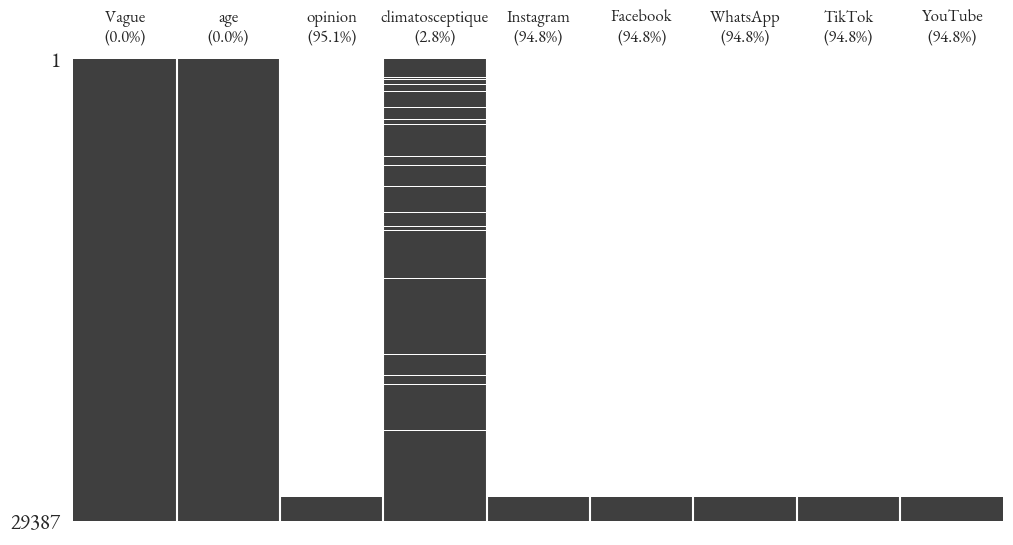

In [302]:
# Création de la figure :
fig, ax = plt.subplots(figsize = (12, 6))

# Génération de la matrice de nullité :
msno.matrix(filtre_nul, 
            ax = ax, 
            fontsize = 12,
            sparkline = False)

# Ajustement des étiquettes de colonnes pour inclure les pourcentages :
ax.set_xticks(range(len(filtre_nul.columns)))
ax.set_xticklabels(etiquettes_nul, 
                   rotation = 0, 
                   ha = 'center', 
                   fontsize = 12)

# Affichage du graphique :
plt.show()

### L. Matrice de nullité 2023 ###

In [303]:
# Filtre des données pour 'Année' est égal à 2023 :
filtre_nul_2023 = filtre_nul[filtre_nul['Vague'] == '2023']
filtre_nul_2023.head(3)

,Vague,age,opinion,climatosceptique,Instagram,Facebook,WhatsApp,TikTok,YouTube
27868,2023,28,Activité humaine,climatofervent,Une fois par jour,Jamais,Plusieurs fois par jour,Une fois par jour,Plusieurs fois par jour
27869,2023,49,Activité humaine,climatofervent,Jamais,Plusieurs fois par jour,Jamais,Jamais,Plusieurs fois par jour
27870,2023,66,Phénomène naturel,climatosceptique,Jamais,Jamais,Jamais,Jamais,Jamais


In [304]:
# Calcul des taux de nullité :
ratios_nul_2023 = filtre_nul_2023.isnull().mean() * 100
ratios_nul_2023.round(1)

Vague               0.0
age                 0.0
opinion             5.1
climatosceptique    1.2
Instagram           0.0
Facebook            0.0
WhatsApp            0.0
TikTok              0.0
YouTube             0.0
dtype: float64

In [305]:
# Préparation des étiquettes de colonnes avec les taux de nullité :
etiquettes_nul_2023 = [f'{col}\n({ratios_nul_2023[col]:.1f}%)' for col in filtre_nul_2023.columns]
etiquettes_nul_2023

['Vague\n(0.0%)',
 'age\n(0.0%)',
 'opinion\n(5.1%)',
 'climatosceptique\n(1.2%)',
 'Instagram\n(0.0%)',
 'Facebook\n(0.0%)',
 'WhatsApp\n(0.0%)',
 'TikTok\n(0.0%)',
 'YouTube\n(0.0%)']

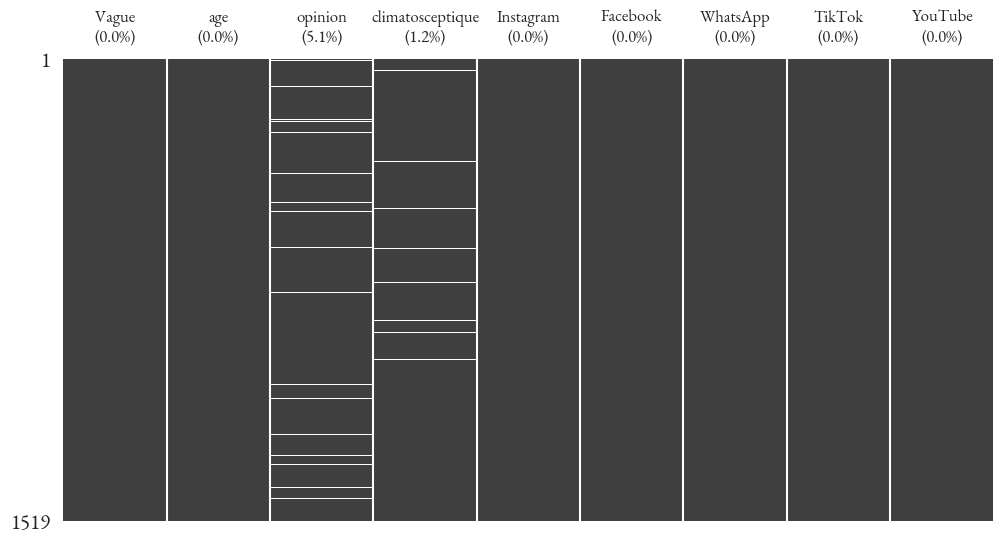

In [306]:
# Création de la figure :
fig, ax = plt.subplots(figsize=(12, 6))

# Génération de la matrice de nullité :
msno.matrix(filtre_nul_2023, 
            ax = ax,
            fontsize = 12,
            sparkline = False)

# Ajustement des étiquettes de colonnes pour inclure les pourcentages :
ax.set_xticks(range(len(filtre_nul_2023.columns)))
ax.set_xticklabels(etiquettes_nul_2023, 
                   rotation = 0, 
                   ha = 'center',
                   fontsize = 12)

# Affichage du graphique :
plt.show()

# III. Visualisation des données #

### A. LINEPLOT (EVOLUTION DU CLIMATOSCEPTICISME AU FIL DU TEMPS) ###

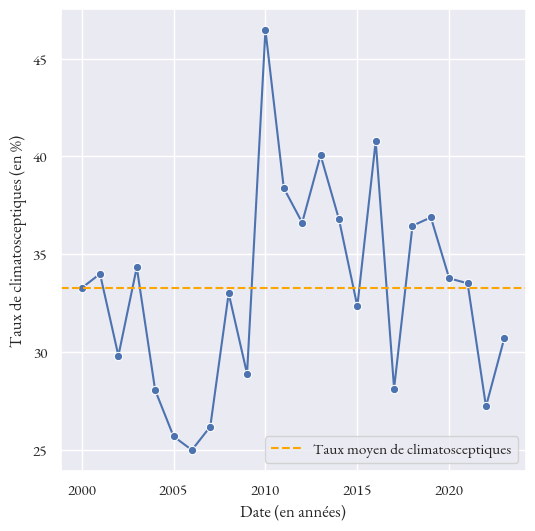

In [307]:
# Création de la figure :
fig, ax = plt.subplots(figsize=(6, 6))

# Paramétrage du thème :
sns.set()

# Paramétrage du style de police des graphiques : 
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 22

# Tracé du graphique :
sns.lineplot(data = barometre_tendance,
            x = 'Vague',
            y = 'taux_climatosceptiques',
            marker ='o')

# Personnaisation des étiquettes des axes :
ax.set(xlabel = 'Date (en années)',
       ylabel = 'Taux de climatosceptiques (en %)')

# Affichage du taux moyen :
ax.axhline(y = moyenne_taux_climatosceptiques,
           label = 'Taux moyen de climatosceptiques',
           linestyle = '--', 
           color = 'orange')

# Affichage de la légende :
ax.legend()
plt.show()

### B. RIDGEPLOT (DENSITE DE CLIMATOSCEPTIQUES EN FONCTION DE L'AGE ET DES ANNEES) ###

In [308]:
# Filtre des données pour ne conserver que les climatosceptiques :
filtered_data = barometre[barometre['climatosceptique'] == 'climatosceptique']
filtered_data.head(3)

,Vague,S1. genre,S3. Zone géo,Région,Département,S7. Taille commune,S7b. Taille commune,S7c. Taille commune,S6. Situation professionnelle,S5. CSP,...,Reso. Usage WhatsApp,Reso. Usage Twitter,Reso. Usage TikTok,Reso. Usage YouTube,poids,UC,age,insee,tranche_age,info_reseaux
5,2000,Une femme,Nord Ouest,Pays de la Loire,Loire-Atlantique,NaN,Dans une agglomération de 100.000 habitants et...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.570370,NaN,28,NaN,25-29,NaN
8,2000,Une femme,Ile de France,Ile de France,Val-d'Oise,NaN,Dans l'agglomération parisienne,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.112676,NaN,51,NaN,50-54,NaN
10,2000,Une femme,Sud Est,Provence - Alpes - Côte d'Azur,Bouches-du-Rhône,NaN,Dans une agglomération de 100.000 habitants et...,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.112676,NaN,43,NaN,40-44,NaN


In [309]:
# Calcul du nombre de répondants par âge :
age_counts = filtered_data.groupby('age').size().reset_index(name='count')

In [310]:
# Copie des âges en fonction du nombre de répondants pour pondération :
weighted_data = filtered_data.copy()
weighted_data = weighted_data.merge(age_counts, on='age')
weighted_data = weighted_data.loc[weighted_data.index.repeat(weighted_data['count'])]
weighted_data.head(3)

,Vague,S1. genre,S3. Zone géo,Région,Département,S7. Taille commune,S7b. Taille commune,S7c. Taille commune,S6. Situation professionnelle,S5. CSP,...,Reso. Usage Twitter,Reso. Usage TikTok,Reso. Usage YouTube,poids,UC,age,insee,tranche_age,info_reseaux,count
0,2000,Une femme,Nord Ouest,Pays de la Loire,Loire-Atlantique,NaN,Dans une agglomération de 100.000 habitants et...,NaN,NaN,NaN,...,NaN,NaN,NaN,0.57037,NaN,28,NaN,25-29,NaN,122
0,2000,Une femme,Nord Ouest,Pays de la Loire,Loire-Atlantique,NaN,Dans une agglomération de 100.000 habitants et...,NaN,NaN,NaN,...,NaN,NaN,NaN,0.57037,NaN,28,NaN,25-29,NaN,122
0,2000,Une femme,Nord Ouest,Pays de la Loire,Loire-Atlantique,NaN,Dans une agglomération de 100.000 habitants et...,NaN,NaN,NaN,...,NaN,NaN,NaN,0.57037,NaN,28,NaN,25-29,NaN,122


/Users/marion/Desktop/UE2/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/marion/Desktop/UE2/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/marion/Desktop/UE2/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/marion/Desktop/UE2/.venv/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  self._figure.ti

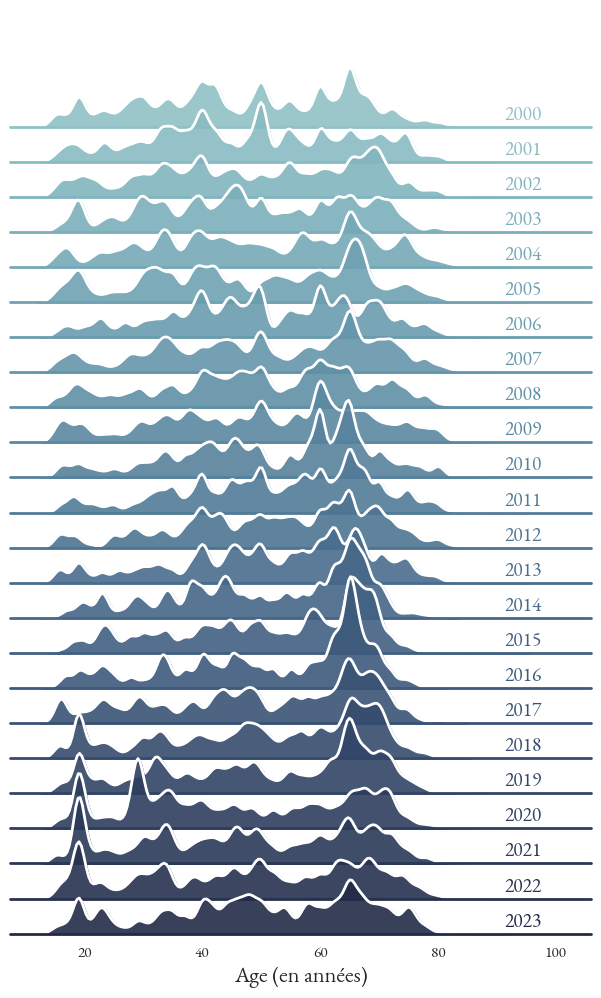

In [311]:
# Paramétrage du thème :
sns.set_theme(style="white", 
              rc={"axes.facecolor": (0, 0, 0, 0)})

# Paramétrage du style de police des graphiques : 
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 14

# Initialisation du FacetGrid :
pal = sns.cubehelix_palette(25, 
                            rot = -.25,
                            light=.7)
g = sns.FacetGrid(weighted_data, 
                  row = "Vague", 
                  hue = "Vague", 
                  aspect = 15, 
                  height = .5, 
                  palette = pal)

# Affichage des densités :
g.map(sns.kdeplot, 
      "age",
      bw_adjust = .5, 
      clip_on = False,
      fill = True, 
      alpha = 0.9,
      linewidth = 1.5)
g.map(sns.kdeplot, 
      "age",
      clip_on = False, 
      color = "w",
      lw = 2,
      bw_adjust = .5)

# Affichage de la ligne de tracé :
g.refline(y = 0,
         linewidth = 2,
         linestyle = "-",
         color = None,
         clip_on = False)

# Affichage des étiquettes :
def label(x, color, label):
    ax = plt.gca()
    ax.text(0.85, 
            0.1, 
            label, 
            fontweight = "bold",
            color = color,
            ha = "left",
            va = "center",
            transform = ax.transAxes)
g.map(label, "age")

# Ajustement des subplots :
g.figure.subplots_adjust(hspace = -0.7)

# Personnalisation des axes :
g.set_titles("")
g.set(yticks = [],
      xlabel = "Age (en années)", 
      ylabel = "")
g.despine(bottom = True, 
          left = True)
plt.xlabel("Age (en années)", fontsize=16) 

# Affichage du tracé :
plt.show()

### C. BARPLOT 1 (DISTRIBUTION DES TYPES D'OPINION EN FONCTION DE L'AGE) ###

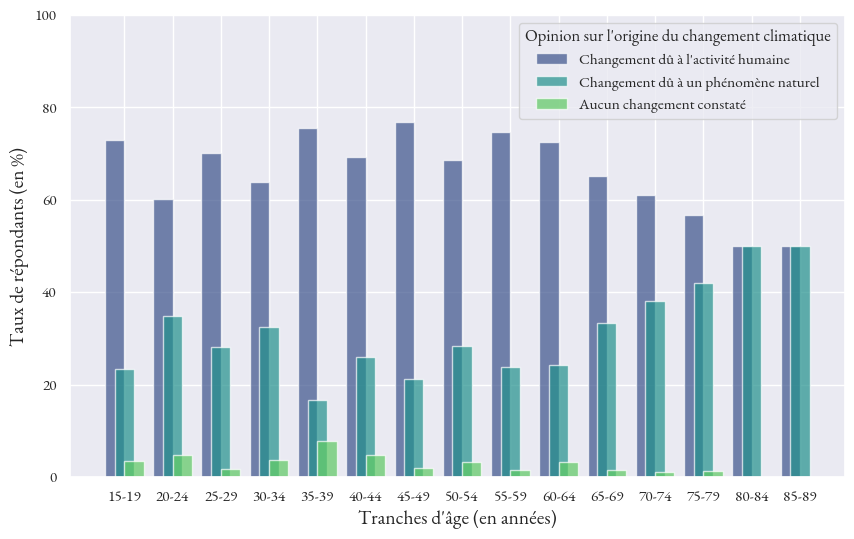

In [314]:
# Création de la figure :
fig, ax = plt.subplots(figsize=(10, 6))

# Ajout du style Seaborn :
sns.set()

# Paramétrage du style de police du graphique : 
plt.rcParams['font.family'] = "EB Garamond"
plt.rcParams['font.size'] = 16

# Hiérarchisation des barres d'opinion :
ordre_opinions = ['Activité humaine', 'Phénomène naturel', 'Absence de phénomène']

# Ajustement de la largeur des barres :
bar_width = 0.4 

# Conversion de la colonne 'tranche_age' en numérique si elle est catégorielle :
barometre_opinion['tranche_age_num'] = barometre_opinion['tranche_age'].cat.codes

# Création du graphique pour chaque opinion avec un décalage manuel :
for i, opinion in enumerate(ordre_opinions):
    # Filtre des données pour l'opinion actuelle :
    data_filtered = barometre_opinion[barometre_opinion['opinion'] == opinion]

    # Décalage des barres (négatif pour la première, positif pour la dernière) :
    offset = (i - 1) * (bar_width / 2)  

    # Ajoutement des barres avec un décalage horizontal :
    ax.bar(data_filtered['tranche_age_num'] + offset, 
           data_filtered['taux_opinion'], 
           width=bar_width,
           label=opinion, 
           alpha=0.7, 
           color=sns.color_palette("viridis", n_colors=len(ordre_opinions))[i])

# Ajustement des étiquettes de l'axe x pour correspondre aux tranches d'âge d'origine :
ax.set_xticks(np.arange(len(barometre_opinion['tranche_age'].cat.categories)))
ax.set_xticklabels(barometre_opinion['tranche_age'].cat.categories)

# Ajustement des limites de l'axe des y :
plt.ylim(0, 100)

# Ajout des titres aux axes x et y :
ax.set_xlabel("Tranches d'âge (en années)", fontsize=14)
ax.set_ylabel('Taux de répondants (en %)', fontsize=14)

# Personnalisation de la légende :
legende_opinions = ["Changement dû à l'activité humaine", 
                    'Changement dû à un phénomène naturel', 
                    'Aucun changement constaté']

# Modification du titre de la légende :
ax.legend(title = "Opinion sur l'origine du changement climatique", 
          labels = legende_opinions)

# Affichage du graphique :
plt.show()

### D. BARPLOT 2 (LIEN POTENTIEL ENTRE RESEAUX SOCIAUX ET CLIMATOSCEPTICISME) ###

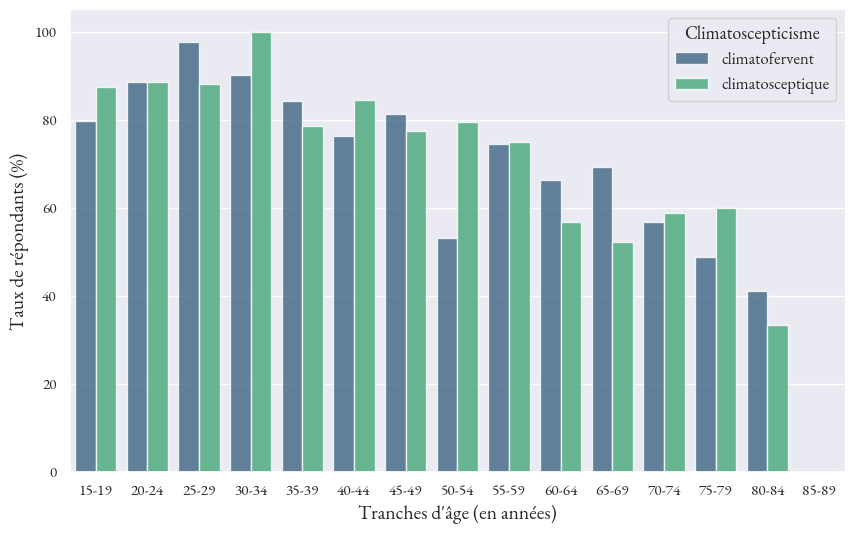

In [315]:
# Création de la figure :
plt.figure(figsize=(10, 6))

# Création du barplot :
ax = sns.barplot(data = barometre_reseaux,
                 x = 'tranche_age',
                 y = 'taux_actu_reseaux',
                 hue = 'climatosceptique',
                 palette = 'viridis',
                 alpha = 0.8)

# Ajout des titres et étiquettes :

ax.set_xlabel("Tranches d'âge (en années)", 
              fontsize = 14)
ax.set_ylabel("Taux de répondants (%)", 
              fontsize = 14)

# Ajout d'une légende personnalisée :
plt.legend(title = 'Climatoscepticisme',
           title_fontsize = '13',
           fontsize='12')

# Ajustement de l'apparence des barres :
sns.despine()

# Affichage du graphique :
plt.show()